## LAB 2 - Kanav Nanda - U20240086

### Step 1 - Importing Libraries

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #importing KMeans algorithm

### Step 2 - Generating Synthetic Data

In [125]:
np.random.seed(0) #for reproducibility
n_samples = 250 #number of points per cluster

### Step 3 - Defining mean and covariance matrices

In [126]:
mu_1 = [2,2]
sigma_1 = [[0.9,-0.0255],[-0.0255,0.9]]
mu_2 = [5,5]
sigma_2 = [[0.5,0],[0,0.3]]
mu_3 = [-2,-2]
sigma_3 = [[1,0],[0,0.9]]
mu_4 = [-4,8]
sigma_4 = [[0.8,0],[0,0.6]]
#defining mean and covariance for 4 different clusters

### Step 4 - Drawing samples from each Gaussian distribution

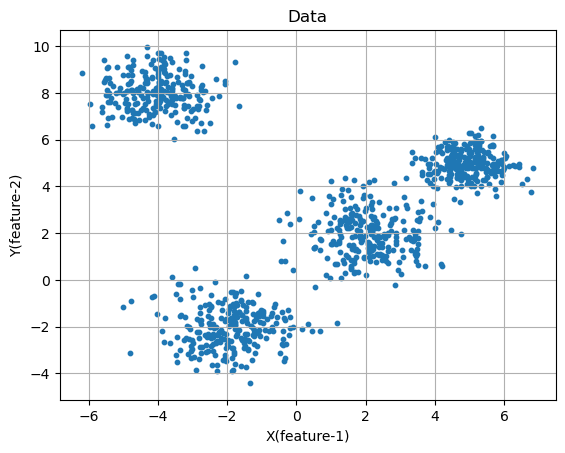

In [127]:
cluster_1 = np.random.multivariate_normal(mu_1,sigma_1,n_samples)
cluster_2 = np.random.multivariate_normal(mu_2,sigma_2,n_samples)
cluster_3 = np.random.multivariate_normal(mu_3,sigma_3,n_samples)
cluster_4 = np.random.multivariate_normal(mu_4,sigma_4,n_samples)
#drawing samples from the distributions
d = np.vstack((cluster_1,cluster_2,cluster_3,cluster_4))
#stacking all datapoints together
plt.scatter(d[:,0],d[:,1],s=10)
plt.title("Data")
plt.xlabel("X(feature-1)")
plt.ylabel("Y(feature-2)")
plt.grid()
plt.show()

### Step 5 - Finding WCSS for different K values

In [128]:
wcss = []
for k in range(1,21): #loop from 1 to 20 to find the elbow point
    k_means = KMeans(n_clusters=k,random_state=0)
    k_means.fit(d)
    wcss.append(k_means.inertia_) #inertia gives WCSS

### Step 6 - Elbow Method Plot

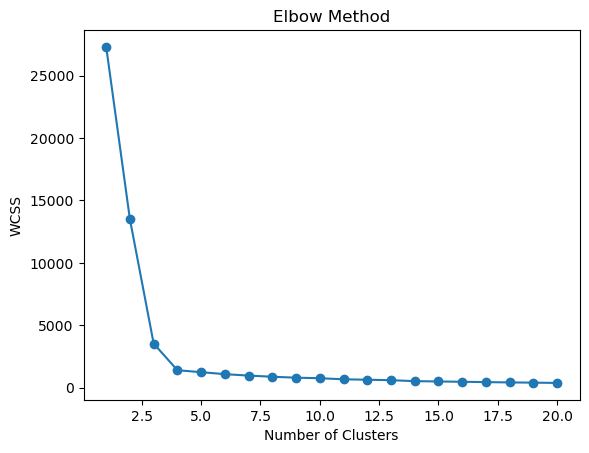

In [129]:
plt.plot(range(1,21), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Step 7 - Applying KMeans with optimal clusters

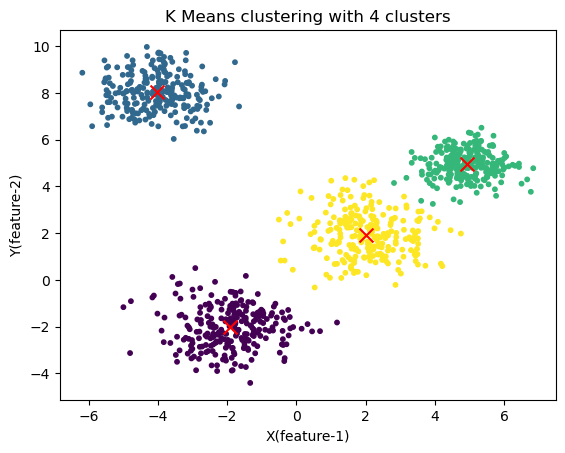

In [130]:
kmeans_optimal = KMeans(n_clusters=4,random_state=0)
labels = kmeans_optimal.fit_predict(d)
centroids = kmeans_optimal.cluster_centers_
plt.scatter(d[:,0],d[:,1],c=labels,cmap='viridis',s=10)
plt.scatter(centroids[:,0],centroids[:,1],c='red',s=100,marker='x')
plt.title("K Means clustering with 4 clusters")
plt.xlabel("X(feature-1)")
plt.ylabel("Y(feature-2)")
plt.show()

## Questions

##### • Q1: What might happen if the value of the number of clusters is set too high or too low in K-Means?

Ans - If K is too low, different groups might be merged into one, losing information (underfitting). If K is too high, one natural cluster might be split into many small clusters (overfitting).

##### • Q2: What is the effect of initializing centroids far apart or too close together in K-Means?

Ans - When centroids are initialized too close to each other, they may converge to a local minimum, which will prevent proper clustering. When initialized far apart from each other, proper clustering will be ensured.

##### • Q3: How might you optimise the centroid initialisation to lead to better clustering?

Ans - We can use the k-means++ algorithm for initialization. This spreads out initial centroids instead of picking them randomly, leading to both faster and better convergence.

##### • Q4: Why might the Elbow Method not always provide a clear solution for choosing the optimal number of clusters?

Ans - Sometimes the WCSS curve is smooth without a sharp elbow. It becomes very subjective to pick the optimal K, and other methods like Silhouette Score might be required.

##### • Q5: How can WCSS be influenced by the presence of outliers or noise in the data?

Ans - WCSS is sensitive to outliers because it squares the distance. A single outlier far from the centroid will majorly increase the WCSS value, ruining the elbow plot.

## THANK-YOU!